In [1024]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [1025]:
# Initial conditions
mBR = 1
mBA = 1
mCLN = 0
Cln = 0
BR = 25
BAm = 8.5
BAd = 0
A0 = 5 * 5**(1/3)
f=0
e = 0

y0 = [mCLN, Cln, BR, BAm, BAd, f]

# Parameters
kd1 = 0.1
kd2_G = 0.1
kp = 0.35
kR_G = 4.75
kAd_G = 0
kAm_G = 1
kgrowth = 0.02 
kR_M = 2
kAd_M =  1
kAm_M =  0
kx = 1
kd2_M = 10

# Simulation time
t0 = 0
t_end = 350

In [1026]:
# Model
def AdurchV(BAm, BAd):
    # f = A0 + kx*(BAm + BAd)
    f = 1/np.sqrt(A0+ kx*(BAm + BAd))
    return f

def f(mCLN, t):
    f = mCLN + np.random.randint(0,2)
    return f

def model(t, y):
    mCLNi, Clni, BRi, BAmi, BAdi, f = y
    # Function
    L = [np.random.randint(0,2), 0]
    # model functions
    if Clni >= 150:
        f = 1
    if f == 0 or t> 200:
        dmCLN = -kd1*mCLNi+L[0]
        dCln = kp*mCLNi*BRi*AdurchV(BAmi, BAdi)-kd2_G*Clni
        dBR = kgrowth*(kR_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*AdurchV(BAmi, BAdi)
        dBAm = kgrowth*(kAm_G/(kR_G+kAm_G+kAd_G))*mBA*BRi*AdurchV(BAmi, BAdi)
        dBAd = kgrowth*(kAd_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*AdurchV(BAmi, BAdi)
    else:
        dmCLN = -kd1*mCLNi+L[1]
        dCln = kp*mCLNi*BRi*AdurchV(BAmi, BAdi)-kd2_M*Clni
        dBR = kgrowth*(kR_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*AdurchV(BAmi, BAdi)
        dBAm = kgrowth*(kAm_M/(kR_M+kAm_M+kAd_M))*mBA*BRi*AdurchV(BAmi, BAdi)
        dBAd = kgrowth*(kAd_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*AdurchV(BAmi, BAdi)
    return [dmCLN, dCln, dBR, dBAm, dBAd, f]


In [1027]:
# Solving ODE
sol = solve_ivp(model,  [t0, t_end], y0, dense_output = True)
mCLN, Cln, BR, BAm, BAd, f = sol.y

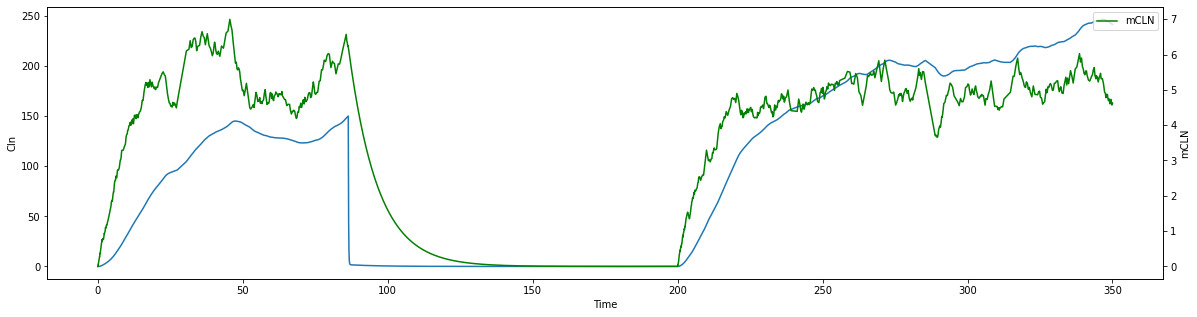

In [1028]:
# Plotting Cln vs mCLN
fig, ax = plt.subplots(figsize = (20, 5))
ax2 = ax.twinx() 
x = ax.plot(sol.t, Cln, label = 'Cln')
x1 = ax2.plot(sol.t, mCLN, 'g', label = 'mCLN')
ax.set_xlabel('Time')
ax2.set_ylabel('mCLN')
ax.set_ylabel('Cln')
plt.legend()
plt.show()

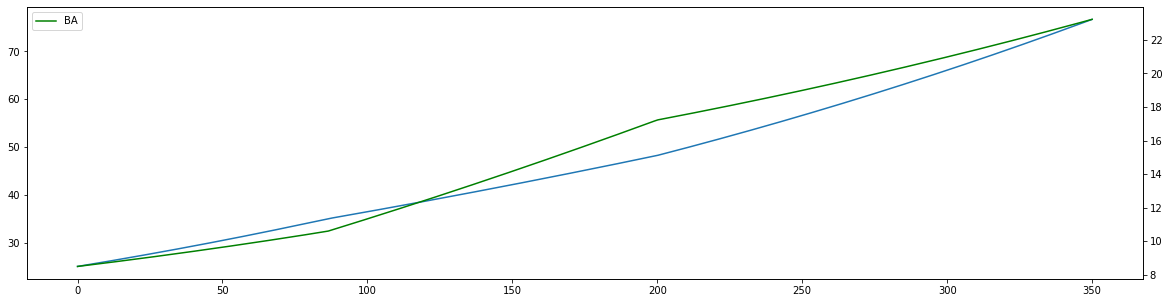

In [1029]:
# Plotting BR vs BA
BA = BAm + BAd
fig, ax = plt.subplots(figsize = (20, 5))
ax2 = ax.twinx() 
ax.plot(sol.t, BR, label = 'BR')
ax2.plot(sol.t, BA, 'g', label = 'BA')
plt.legend()
plt.show()

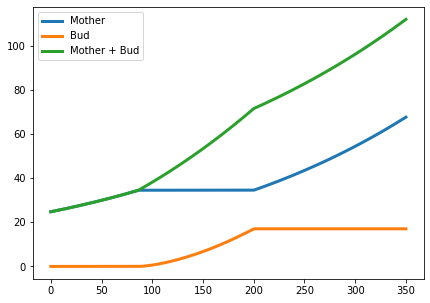

In [1030]:
# Plotting Volume
Vboth = (kx*(BAm+BAd))**(3/2)
Vmother = (kx*(BAm))**(3/2)
Vbud = (kx*(BAd))**(3/2)
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(sol.t, Vmother, linewidth = 3, label = 'Mother')
ax.plot(sol.t, Vbud, linewidth = 3, label = 'Bud')
ax.plot(sol.t, Vboth, linewidth = 3, label = 'Mother + Bud')
plt.legend()
plt.show()